In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_test = pd.read_csv("gender_submission.csv")

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### From train.isnull(), it is noted that the Age and Cabin columns turns out to have null values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

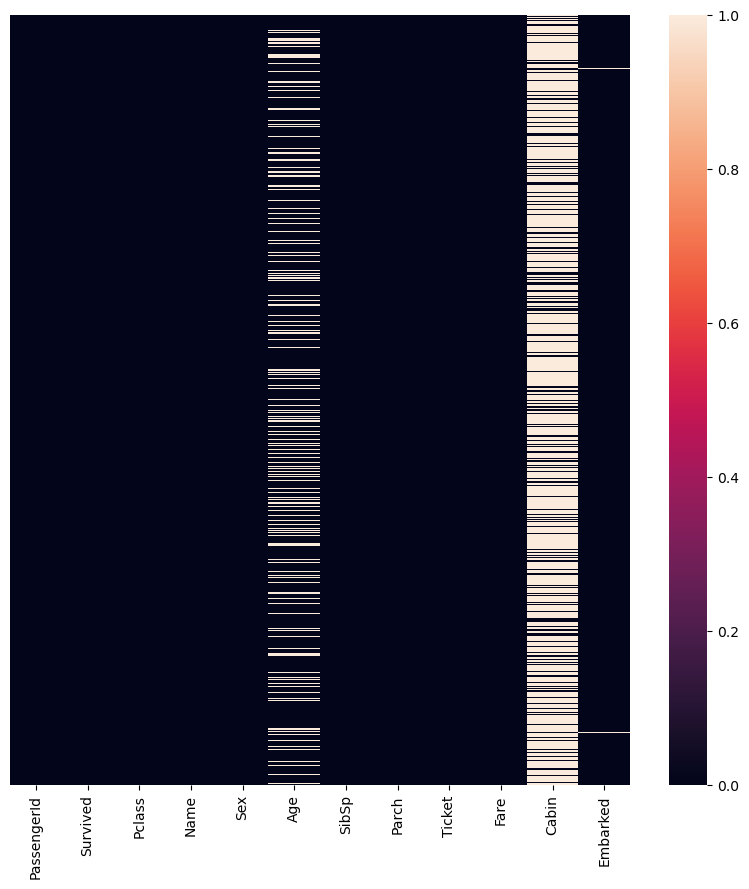

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False, cbar=True)

<Axes: xlabel='Pclass', ylabel='Age'>

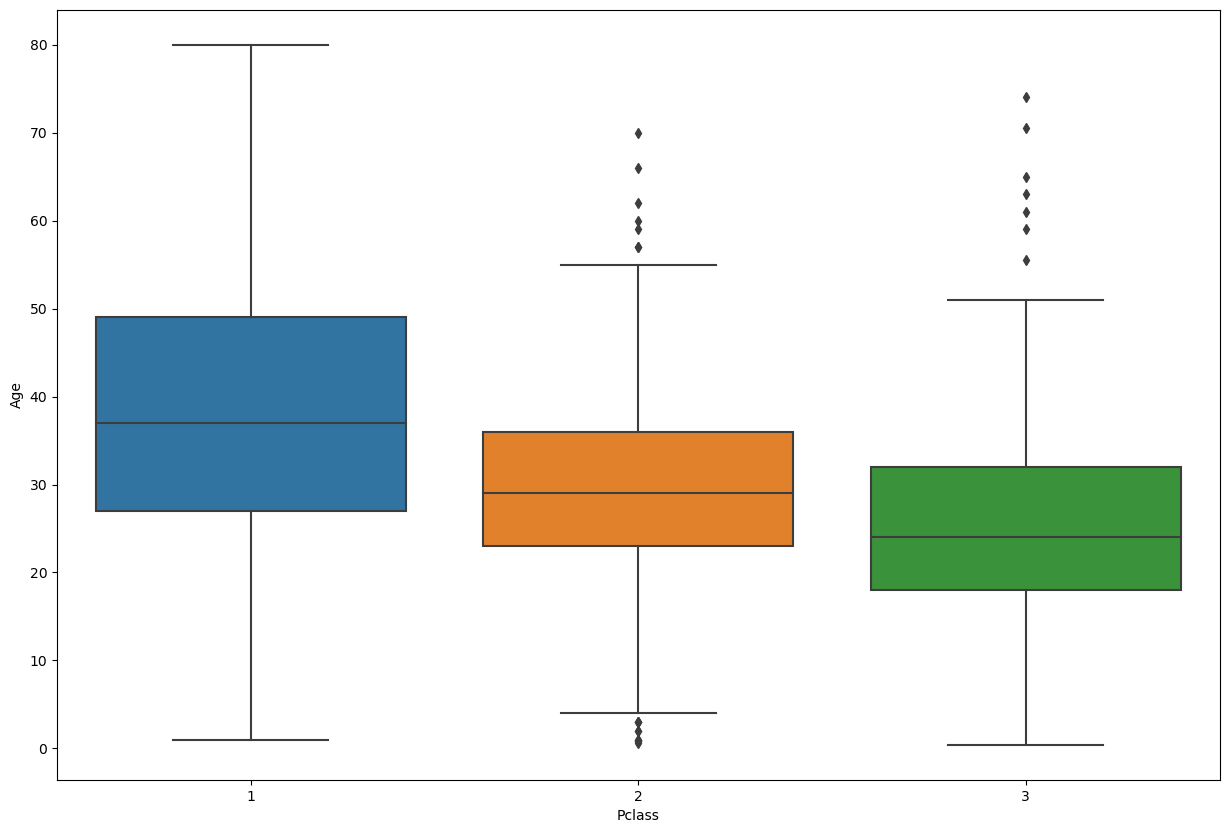

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [8]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
train['Age']=train[['Age','Pclass']].apply(Age_1,axis=1)

In [10]:
train.drop(['PassengerId','Ticket','Cabin','Name'],inplace=True, axis=1)

In [11]:
test.drop(['PassengerId','Ticket','Cabin','Name'],inplace=True, axis=1)

In [12]:
train = train.dropna(axis=0,how='any')

<Axes: >

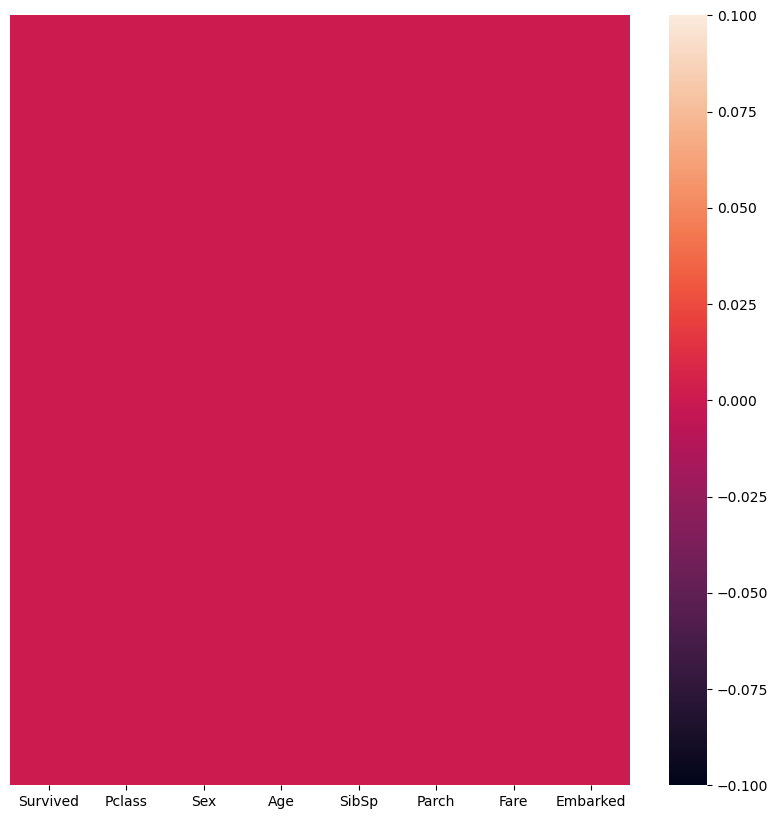

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

<Axes: xlabel='Pclass', ylabel='Age'>

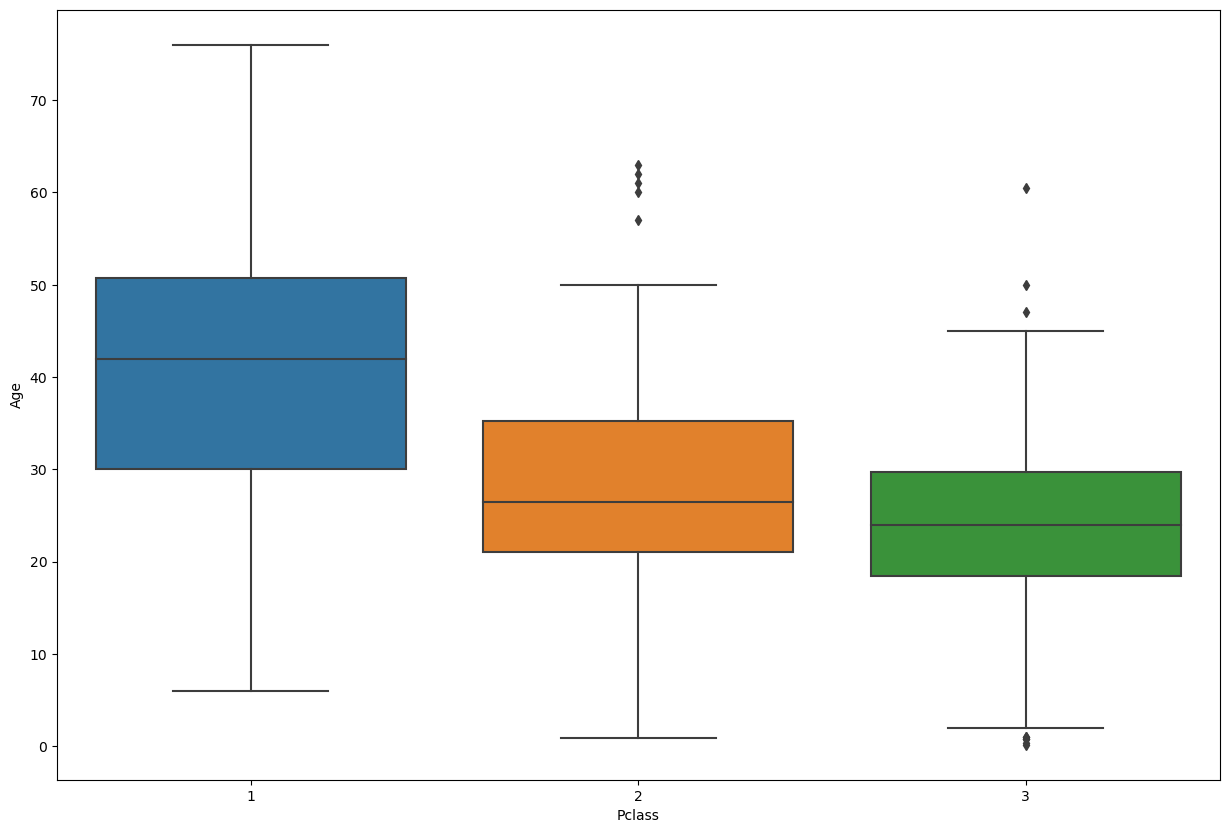

In [14]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Pclass',y='Age',data=test)

In [15]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 25
        else:
            return 22
    else:
        return Age

In [16]:
test['Age']=test[['Age','Pclass']].apply(Age_1,axis=1)

<Axes: xlabel='Survived', ylabel='count'>

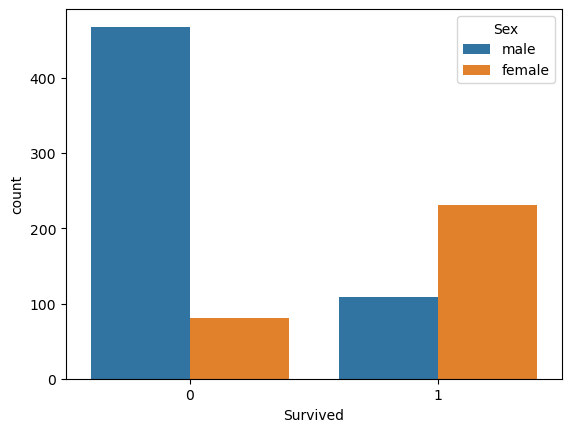

In [17]:
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Pclass', ylabel='Fare'>

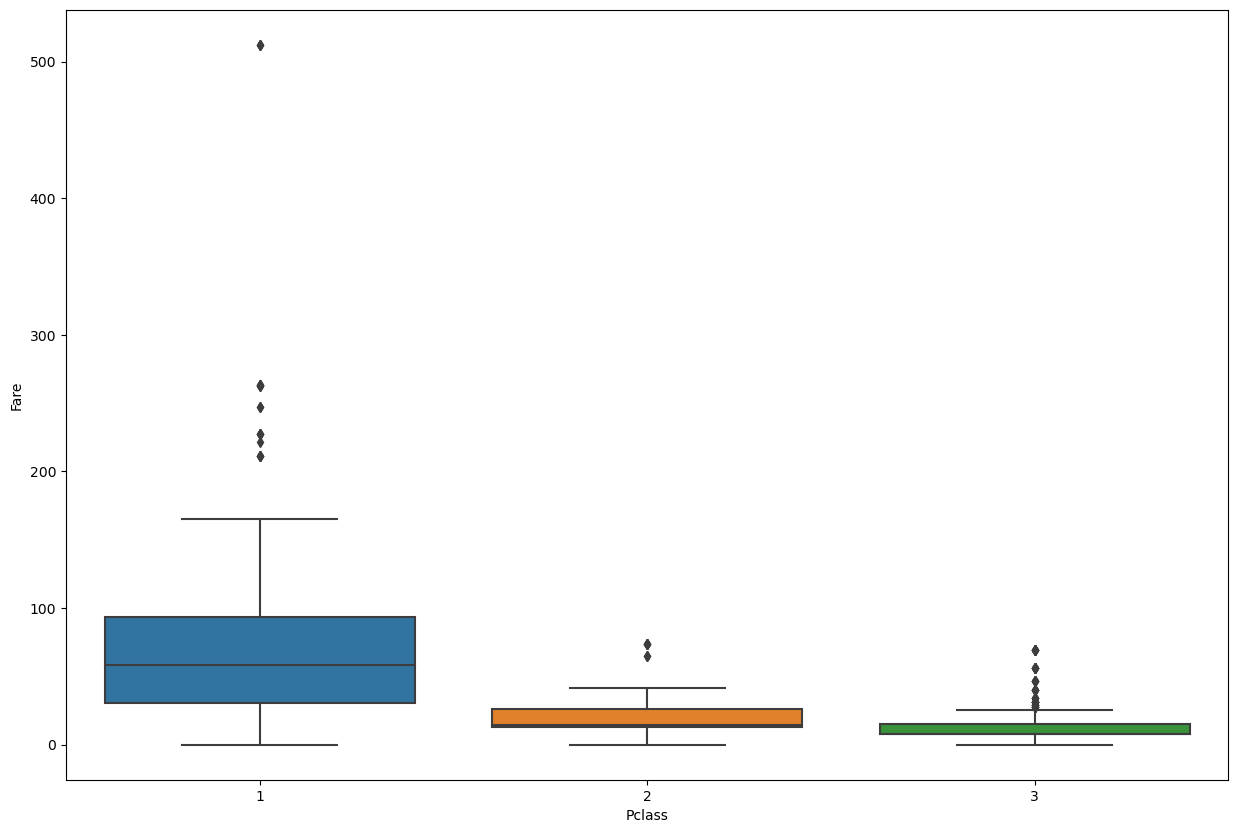

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Fare',data=train)

<Axes: xlabel='Survived', ylabel='count'>

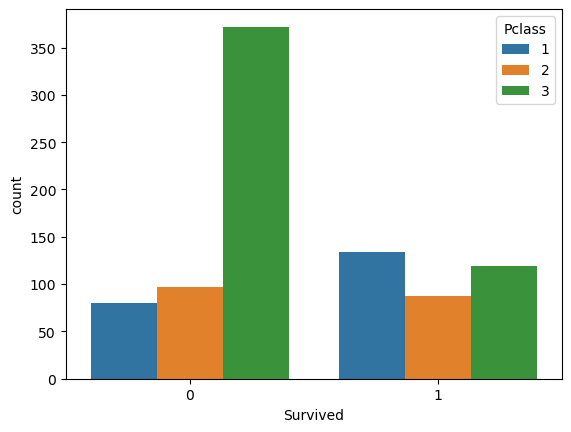

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=train)

C:\Users\Esther Jokodola\AppData\Local\Temp\ipykernel_9224\2454231697.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'],bins=40)


<Axes: xlabel='Fare', ylabel='Density'>

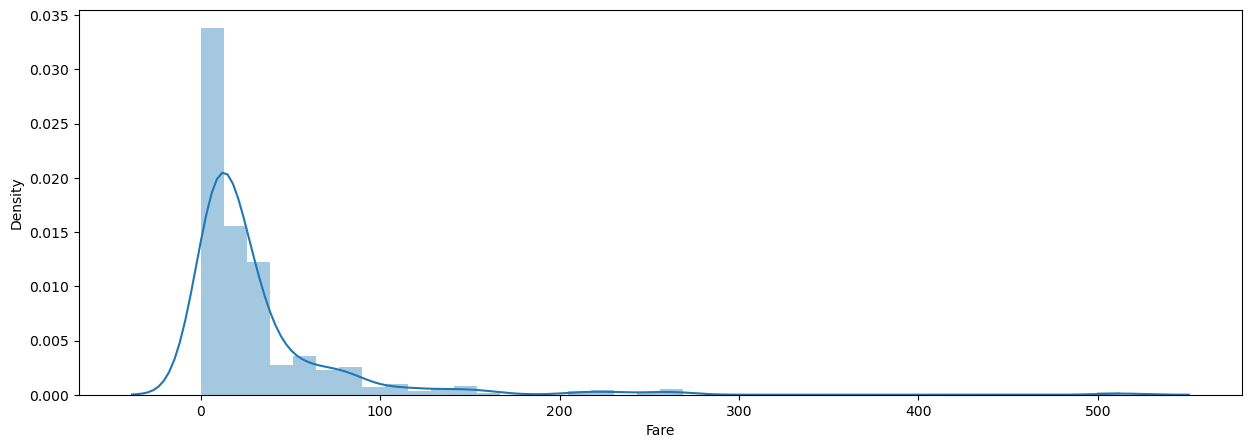

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(train['Fare'],bins=40)

C:\Users\Esther Jokodola\AppData\Local\Temp\ipykernel_9224\4124510342.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_fare,bins=40)


<Axes: xlabel='Fare', ylabel='Density'>

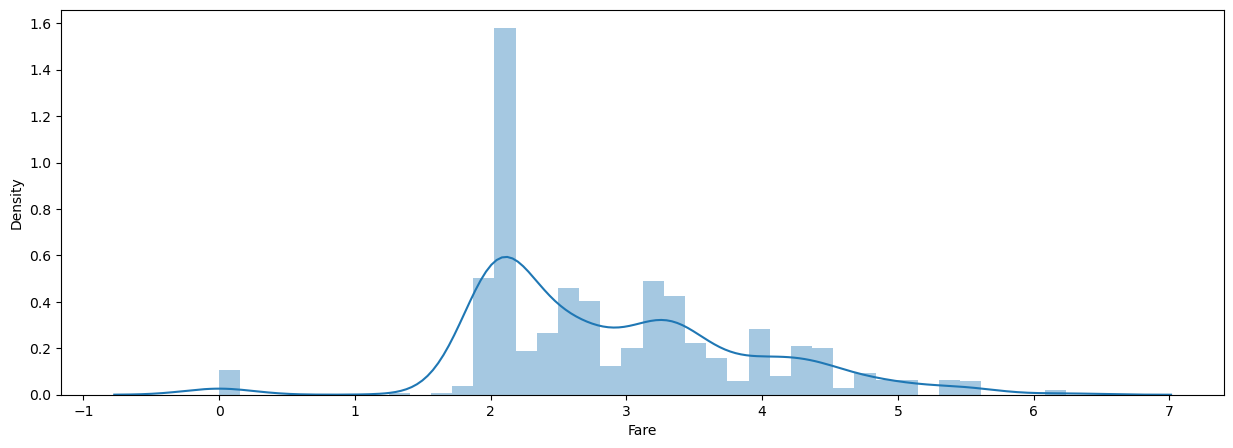

In [21]:
train_fare=train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(15,5))
sns.distplot(train_fare,bins=40)

In [22]:
fare = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [23]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
emb=pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
y_train=train['Survived']
train.drop(['Embarked','Sex','Survived','Fare'],inplace=True,axis=1)

In [25]:
x_train = pd.concat([train,sex,emb,fare],axis=1)

In [26]:
y_test.drop('PassengerId',inplace=True,axis=1)

In [27]:
x_train

,Pclass,Age,SibSp,Parch,male,Q,S,Fare
0,3,22.0,1,0,1,0,1,1.981001
1,1,38.0,1,0,0,0,0,4.266662
2,3,26.0,0,0,0,0,1,2.070022
3,1,35.0,1,0,0,0,1,3.972177
4,3,35.0,0,0,1,0,1,2.085672
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,0,1,2.564949
887,1,19.0,0,0,0,0,1,3.401197
888,3,24.0,1,2,0,0,1,3.154870
889,1,26.0,0,0,1,0,0,3.401197


In [28]:
test_fare=test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [29]:
test_sex=pd.get_dummies(test['Sex'],drop_first=True)
test_emb=pd.get_dummies(test['Embarked'],drop_first = True)
test.drop(['Embarked','Sex','Fare'],inplace=True,axis=1)
test=pd.concat([test,test_sex,test_emb,test_fare],axis=1)

In [30]:
y_test=pd.concat([test,test_sex,test_emb,test_fare,y_test],axis=1)
y_test=y_test.dropna(axis=0,how='any')

In [31]:
y_test=y_test['Survived']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
lgr=LogisticRegression(max_iter=500)
lgr_train=lgr.fit(x_train,y_train)
y_pred=lgr.predict(test)

In [34]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.930622009569378


In [35]:
# classification=classification_report(y_test,y_pred)
# print('Classification',classification)
# confusion_matrix=confusion_matrix(y_test,y_pred)
# print('Confusion_matrix:',confusion_matrix)

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
rnd_clf = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(x_train,y_train)
y_pred=rnd_clf.predict(test)

In [38]:
accuracy_score=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy_score)

Accuracy: 0.8923444976076556


In [39]:
# classification=classification_report(y_test,y_pred)
# print('Classification',classification)
# confusion_matrix=confusion_matrix(y_test,y_pred)
# print('Confusion_matrix:',confusion_matrix)

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [41]:
params = [{'max_leaf_nodes': list(range(2,100)),'min_samples_split':[2,3,4]}]
b_clf=BaggingClassifier(GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=3,verbose=1),n_estimators=1000,max_samples=100,bootstrap=True,n_jobs=-1)
b_clf.fit(x_train,y_train)
y_pred = b_clf.predict(test)

In [48]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.992822966507177
